In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.applications import ResNet50, Xception, InceptionResNetV2
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
import keras
import dlib
import cv2
from sklearn import preprocessing
from imutils import face_utils
import numpy as np
from keras.optimizers import SGD,Adam
from keras.layers import UpSampling2D
from tensorflow.keras import Model

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy.random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.load('/content/drive/MyDrive/DATASETS/X_train_KDEF_96.npy')
y_train = np.load('/content/drive/MyDrive/DATASETS/y_train_KDEF_96.npy')

In [ ]:
X_test = np.load('/content/drive/MyDrive/DATASETS/X_test_KDEF_96.npy')
y_test = np.load('/content/drive/MyDrive/DATASETS/y_test_KDEF_96.npy')

5


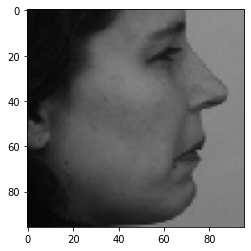

In [ ]:
import matplotlib.pyplot as plt
print(y_train[200])
##print(le.inverse_transform(y_train_KDEF[200]))
plt.imshow(X_train[200])
plt.show()

In [ ]:
x_train_data = X_train
print(x_train_data.shape)
y_train_data = to_categorical(y_train, 7)
print(y_train_data.shape)
x_test_data = X_test
print(x_test_data.shape)
y_test_data = to_categorical(y_test, 7)
print(y_test_data.shape)

(1213, 96, 96, 3)
(1213, 7)
(1210, 96, 96, 3)
(1210, 7)


In [ ]:
from sklearn.model_selection import train_test_split
x_train_final, x_valid_final, y_train_final, y_valid_final = train_test_split(x_train_data, y_train_data, test_size=0.1, random_state=42)

In [ ]:

from keras.models import Sequential, load_model

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(96, 96, 3), activation='relu', padding='same',name='conv96_1'))
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(96, 96, 3), activation='relu', padding='same',name='conv96_3'))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',name='conv96_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool96_1'))


prior = load_model('/content/drive/MyDrive/DATASETS/test2_48.h5')


for layer in prior.layers[1:]:
    model.add(layer)


for layer in prior.layers[-4:]:
    print(layer)
    layer.trainable = False
from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv96_1 (Conv2D)            (None, 96, 96, 64)        1792      
_________________________________________________________________
conv96_3 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv96_2 (Conv2D)            (None, 96, 96, 32)        18464     
_________________________________________________________________
maxpool96_1 (MaxPooling2D)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0

In [ ]:

#sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]
adam=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr = 1e-4), metrics=['accuracy'])

#model.fit(x_train_data,y_train_data,batch_size = 64,epochs=100)
history = model.fit(x_train_final , y_train_final, batch_size=64,epochs=100,validation_data=(x_valid_final, y_valid_final),verbose=1, use_multiprocessing=True)

#model.fit(X_train, Y_train, batch_size = 1000, nb_epoch = 5, verbose = 1, shuffle = True)


Epoch 1/100
18/18 [==============================] - 12s 221ms/step - loss: 4.5310 - accuracy: 0.1496 - val_loss: 1.8130 - val_accuracy: 0.3197
Epoch 2/100
18/18 [==============================] - 3s 147ms/step - loss: 1.6502 - accuracy: 0.4476 - val_loss: 1.4712 - val_accuracy: 0.5082
Epoch 3/100
18/18 [==============================] - 3s 146ms/step - loss: 1.1692 - accuracy: 0.6734 - val_loss: 1.2022 - val_accuracy: 0.5738
Epoch 4/100
18/18 [==============================] - 3s 147ms/step - loss: 0.8024 - accuracy: 0.7646 - val_loss: 1.0989 - val_accuracy: 0.5738
Epoch 5/100
18/18 [==============================] - 3s 146ms/step - loss: 0.6219 - accuracy: 0.8232 - val_loss: 1.0572 - val_accuracy: 0.5902
Epoch 6/100
18/18 [==============================] - 3s 146ms/step - loss: 0.5237 - accuracy: 0.8241 - val_loss: 1.0846 - val_accuracy: 0.5902
Epoch 7/100
18/18 [==============================] - 3s 154ms/step - loss: 0.4082 - accuracy: 0.8748 - val_loss: 1.0775 - val_accuracy: 0.639

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

In [ ]:
import matplotlib.pyplot as plt             

def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    
    plt.plot(history.history['accuracy'], label = "acc")
    plt.plot(history.history['val_accuracy'], label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'] ,label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

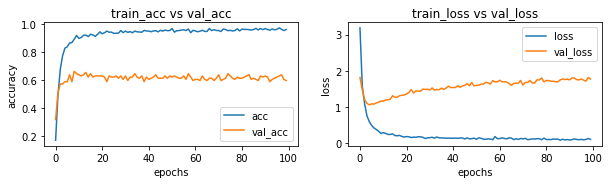

In [ ]:
plot_accuracy_loss(history)

In [ ]:
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model

#model=load_model('/content/drive/MyDrive/DATASETS/test2_48.h5')
model.summary()
predicted = model.predict(X_test)
pred_labels = np.argmax(predicted, axis = 1)
report = classification_report(y_test, pred_labels)
print(report)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv96_1 (Conv2D)            (None, 96, 96, 64)        1792      
_________________________________________________________________
conv96_3 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv96_2 (Conv2D)            (None, 96, 96, 32)        18464     
_________________________________________________________________
maxpool96_1 (MaxPooling2D)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0

In [ ]:
model.save('/content/drive/MyDrive/DATASETS/test_96.h5')